In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import os

%run ../Dataset.ipynb

plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [18]:
# --- Veri Kümeleri ---
root_dir = '../data/img_align_celeba/'

train_dataset = CelebADataset(img_dir=root_dir, attr_path='../data/list_attr_celeba.csv', partition_path='../data/list_eval_partition.csv' , mode='train')
val_dataset   = CelebADataset(img_dir=root_dir, attr_path='../data/list_attr_celeba.csv', partition_path='../data/list_eval_partition.csv', mode='val')
test_dataset  = CelebADataset(img_dir=root_dir, attr_path='../data/list_attr_celeba.csv', partition_path='../data/list_eval_partition.csv', mode='test')

# --- DataLoader'lar ---
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=100, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=100, shuffle=False)

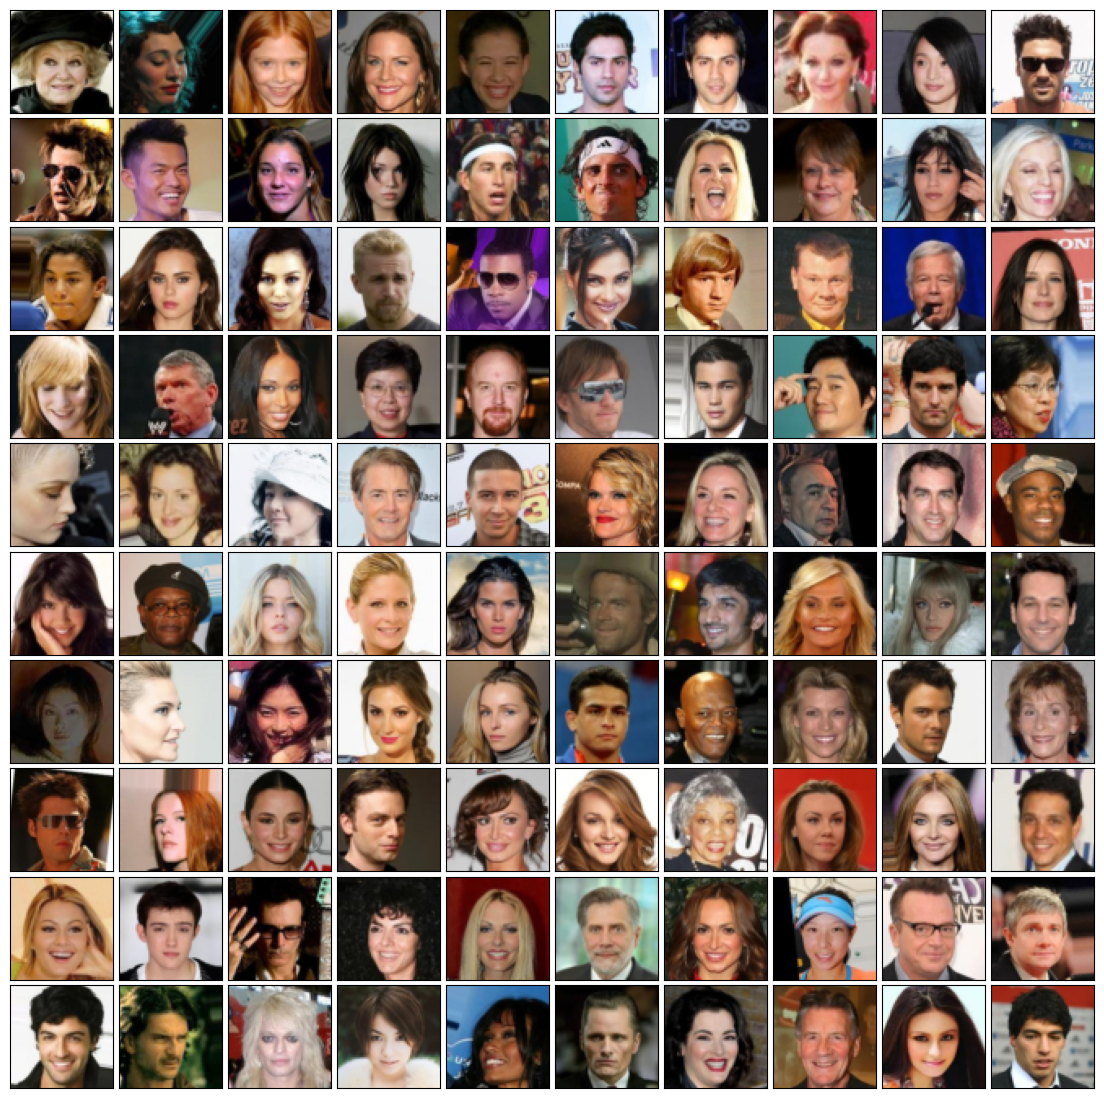

In [21]:
X_test = next(iter(test_loader))

fig, axs = plt.subplots(10, 10, figsize=(14, 14), sharex=True, sharey=True,
                        subplot_kw={'xticks': [], 'yticks': []},
                        gridspec_kw=dict(hspace=0.05, wspace=0.05))

for i in range(10):
    for j in range(10):
        idx = i * 10 + j
        axs[i, j].imshow(X_test[idx].reshape(3, 64, 64).permute(1, 2, 0).detach().numpy())

plt.savefig('./celebA_HQ.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [22]:
len(train_dataset) + len(val_dataset) + len(test_dataset)

202599